In [2]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Pre-Processing

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [6]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [7]:
data = X.copy(deep=True)
data['Diabetes_binary'] = y
print(data['Diabetes_binary'].value_counts())

0    218334
1     35346
Name: Diabetes_binary, dtype: int64


In [8]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [9]:
data.duplicated().sum()

24206

In [10]:
data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [11]:
percentage_diabetes_0 = (data['Diabetes_binary'].value_counts()[0] / len(data)) * 100
percentage_diabetes_1 = (data['Diabetes_binary'].value_counts()[1] / len(data)) * 100

# Display the percentages
print("Percentage of Patients Without Diabetes :", percentage_diabetes_0, "%")
print("Percentage of Patients With Diabetes :", percentage_diabetes_1, "%")

Percentage of Patients Without Diabetes : 86.06669820245979 %
Percentage of Patients With Diabetes : 13.933301797540206 %


In [12]:
positive = data[data['Diabetes_binary'] == 1]
negative = data[data['Diabetes_binary'] == 0]

target_negative = int(len(positive) / 0.4 * 0.6)

negative_sample = negative.sample(target_negative).reset_index(drop=True)
balanced_data = pd.concat([positive, negative_sample]).reset_index(drop=True)
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

print("Balanced Data Class Distribution:")
print(balanced_data['Diabetes_binary'].value_counts())

Balanced Data Class Distribution:
0    53019
1    35346
Name: Diabetes_binary, dtype: int64


In [13]:
percentage_positive = (balanced_data['Diabetes_binary'].value_counts()[1] / len(balanced_data)) * 100
percentage_negative = (balanced_data['Diabetes_binary'].value_counts()[0] / len(balanced_data)) * 100

print(f"Percentage of Patients With Diabetes : {percentage_positive:.2f}%")
print(f"Percentage of Patients Without Diabetes : {percentage_negative:.2f}%")

Percentage of Patients With Diabetes : 40.00%
Percentage of Patients Without Diabetes : 60.00%


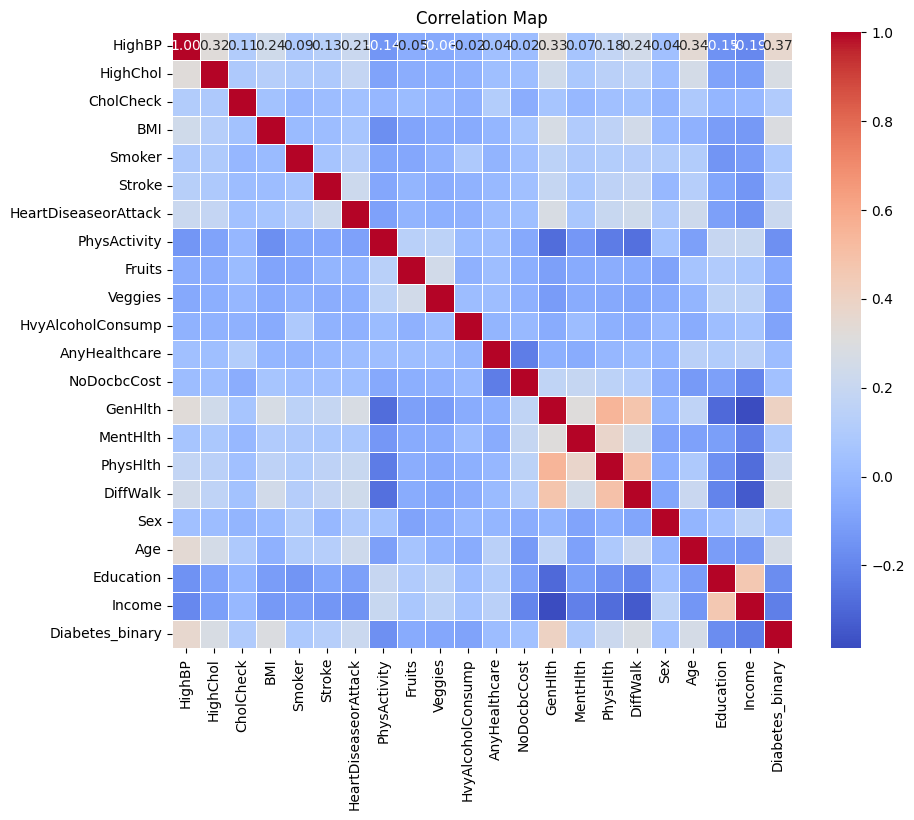

In [14]:
correlation_matrix = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

In [15]:
balanced_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,0,1,41,1,0,0,0,1,1,...,0,3,0,0,0,1,11,5,5,1
1,1,1,1,29,0,0,0,1,0,0,...,0,2,0,0,0,1,7,6,8,1
2,1,1,1,35,1,1,1,1,0,1,...,0,3,0,0,0,1,10,4,7,0
3,1,1,1,28,0,0,1,0,0,1,...,0,5,30,30,1,1,10,5,6,1
4,1,0,1,42,0,0,0,1,1,1,...,0,3,0,1,0,0,6,6,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88360,1,0,1,28,1,0,0,1,1,1,...,0,2,0,0,0,0,11,3,7,1
88361,1,1,1,29,1,0,1,0,1,1,...,0,3,0,7,0,0,13,4,7,0
88362,1,0,1,46,1,0,0,0,1,1,...,0,4,0,0,1,1,8,6,8,1
88363,1,1,1,36,1,0,0,0,0,0,...,1,3,0,0,0,1,7,4,6,1


### Data Preprocessing

In [16]:
X = balanced_data.drop('Diabetes_binary',axis=1)
y = balanced_data['Diabetes_binary']

In [17]:
scaler=StandardScaler()
x_std=scaler.fit_transform(X)
x_std

array([[ 0.94397606, -0.99983026,  0.16936405, ...,  0.87537865,
         0.03725812, -0.37124845],
       [ 0.94397606,  1.00016976,  0.16936405, ..., -0.49082661,
         1.02033188,  1.02391334],
       [ 0.94397606,  1.00016976,  0.16936405, ...,  0.53382733,
        -0.94581564,  0.55885941],
       ...,
       [ 0.94397606, -0.99983026,  0.16936405, ..., -0.1492753 ,
         1.02033188,  1.02391334],
       [ 0.94397606,  1.00016976,  0.16936405, ..., -0.49082661,
        -0.94581564,  0.09380548],
       [ 0.94397606,  1.00016976,  0.16936405, ...,  0.87537865,
        -0.94581564,  0.09380548]])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (66273, 21)
x_test: (22092, 21)
y_train: (66273,)
y_test: (22092,)


## SVM

### Model Generation SVM - Linear

In [19]:
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

### Model Evaluation

In [20]:
prediction=classifier.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 74.67861669382582


In [21]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6905600363512439
Recall: 0.679293775840876
F1-Score: 0.6848805768364128


### Model Generation SVM - Poly

In [22]:
classifier_pol=svm.SVC(kernel='poly')
classifier_pol.fit(x_train,y_train)

SVC(kernel='poly')

### Model Evaluation -Poly

In [24]:
prediction=classifier_pol.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 74.43871084555495


In [23]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6905600363512439
Recall: 0.679293775840876
F1-Score: 0.6848805768364128


### Model Generation SVM - Radial Basis Funct

In [25]:
classifier_rbf=svm.SVC(kernel='rbf')
classifier_rbf.fit(x_train,y_train)

SVC()

### Model Evaluation - Radial Basis Funct

In [26]:
prediction=classifier_rbf.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 74.75104110085098


In [27]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6939808953849695
Recall: 0.6738183037210862
F1-Score: 0.6837509921759837


## Naive Bayes

In [28]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [29]:
prediction_NB = model.predict(x_test)

In [32]:
testing_data_accuracy =accuracy_score(prediction_NB,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 72.1211298207496


In [33]:
precision = precision_score(y_test, prediction_NB)
recall = recall_score(y_test, prediction_NB)
f1 = f1_score(y_test, prediction_NB)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6489111870196413
Recall: 0.679293775840876
F1-Score: 0.6637549817109788


### PCA

In [34]:
pca = PCA()
pca.fit(balanced_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [35]:
d = np.argmax(cumsum >= 0.95) + 1
d

4

In [36]:
pca = PCA(n_components=4)
pca.fit(balanced_data)

PCA(n_components=4)

In [37]:
# Get the indices of the top features for each component
top_feature_indices = [component.argsort()[-1::-1][:1] for component in pca.components_]

# Get the feature names for the top features of each component
feature_names = list(balanced_data.columns[:-1])  
top_features_names = []

for indices in top_feature_indices:
    top_feature_names = [feature_names[i] for i in indices]
    top_features_names.append(top_feature_names)

In [38]:
top_features_names

[['PhysHlth'], ['BMI'], ['MentHlth'], ['Income']]

### SVM

In [39]:
x_pca = pca.transform(balanced_data)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, balanced_data['Diabetes_binary'], test_size=0.2)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [44]:
testing_data_accuracy =accuracy_score(y_pred,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 70.4068352854637


In [45]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6658754792769764
Recall: 0.5175251880232723
F1-Score: 0.5824017885659534


### Naive Bayes

In [46]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [47]:
testing_data_accuracy =accuracy_score(y_pred,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 67.14762632263906


In [48]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6404163837972392
Recall: 0.40158932879239395
F1-Score: 0.4936333507762079
